<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammadparsa Ghaderahamdi

**Student ID**: 401102253


# 📈 **Linear Regression**
#### **What is linear regression used for?**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

# **Making Predictions with Linear Regression**

Given the representation is a linear equation, making predictions is as simple as solving the equation for a specific set of inputs.

Let’s make this concrete with an example. Imagine we are predicting y from  x. Our linear regression model representation for this problem would be:

**y = B0 + B1 * x1**


Where B0 is the bias coefficient and B1 is the coefficient for x column. We use a learning technique to find a good set of coefficient values. Once found, we can plug in different height values to predict y.

you are only allowed to use these libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

Load a real estate dataset, display its first few rows, examine its shape, check its data types, compute the correlations between its features, and visualize these correlations using a heatmap?

In [4]:
#code here
df = pd.read_csv('Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


Exploratory Data Analysis (EDA)

Create pairwise scatter plots for all the features in a real estate dataset, and briefly explain your undrestanding of this plot.

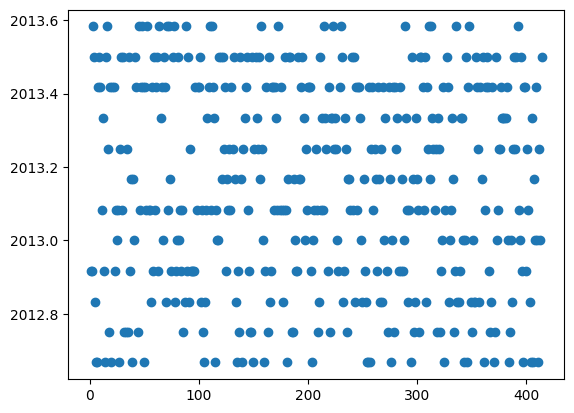

In [5]:
#code here
plt.scatter(x=df.No, y=df['X1 transaction date'])

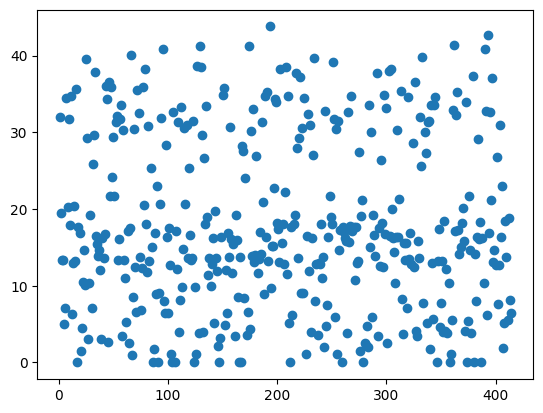

In [6]:
plt.scatter(df.No, y=df['X2 house age'])

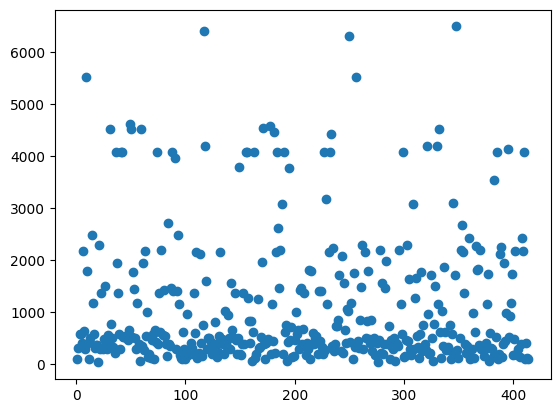

In [7]:
plt.scatter(df.No, y=df['X3 distance to the nearest MRT station'])

Text(0.5, 0, 'X4 number of convenience stores')

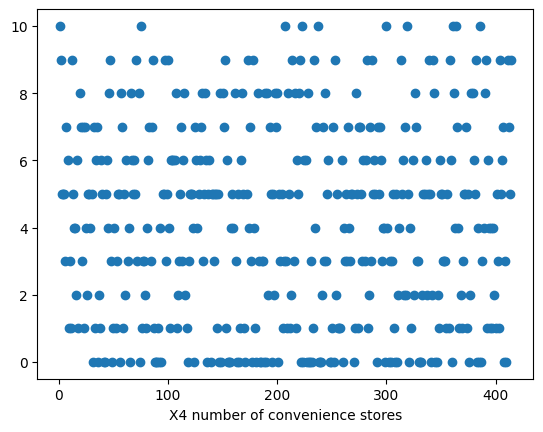

In [9]:
plt.scatter(df.No, y=df['X4 number of convenience stores'])
plt.xlabel(df.columns[4])
plt.ylabel

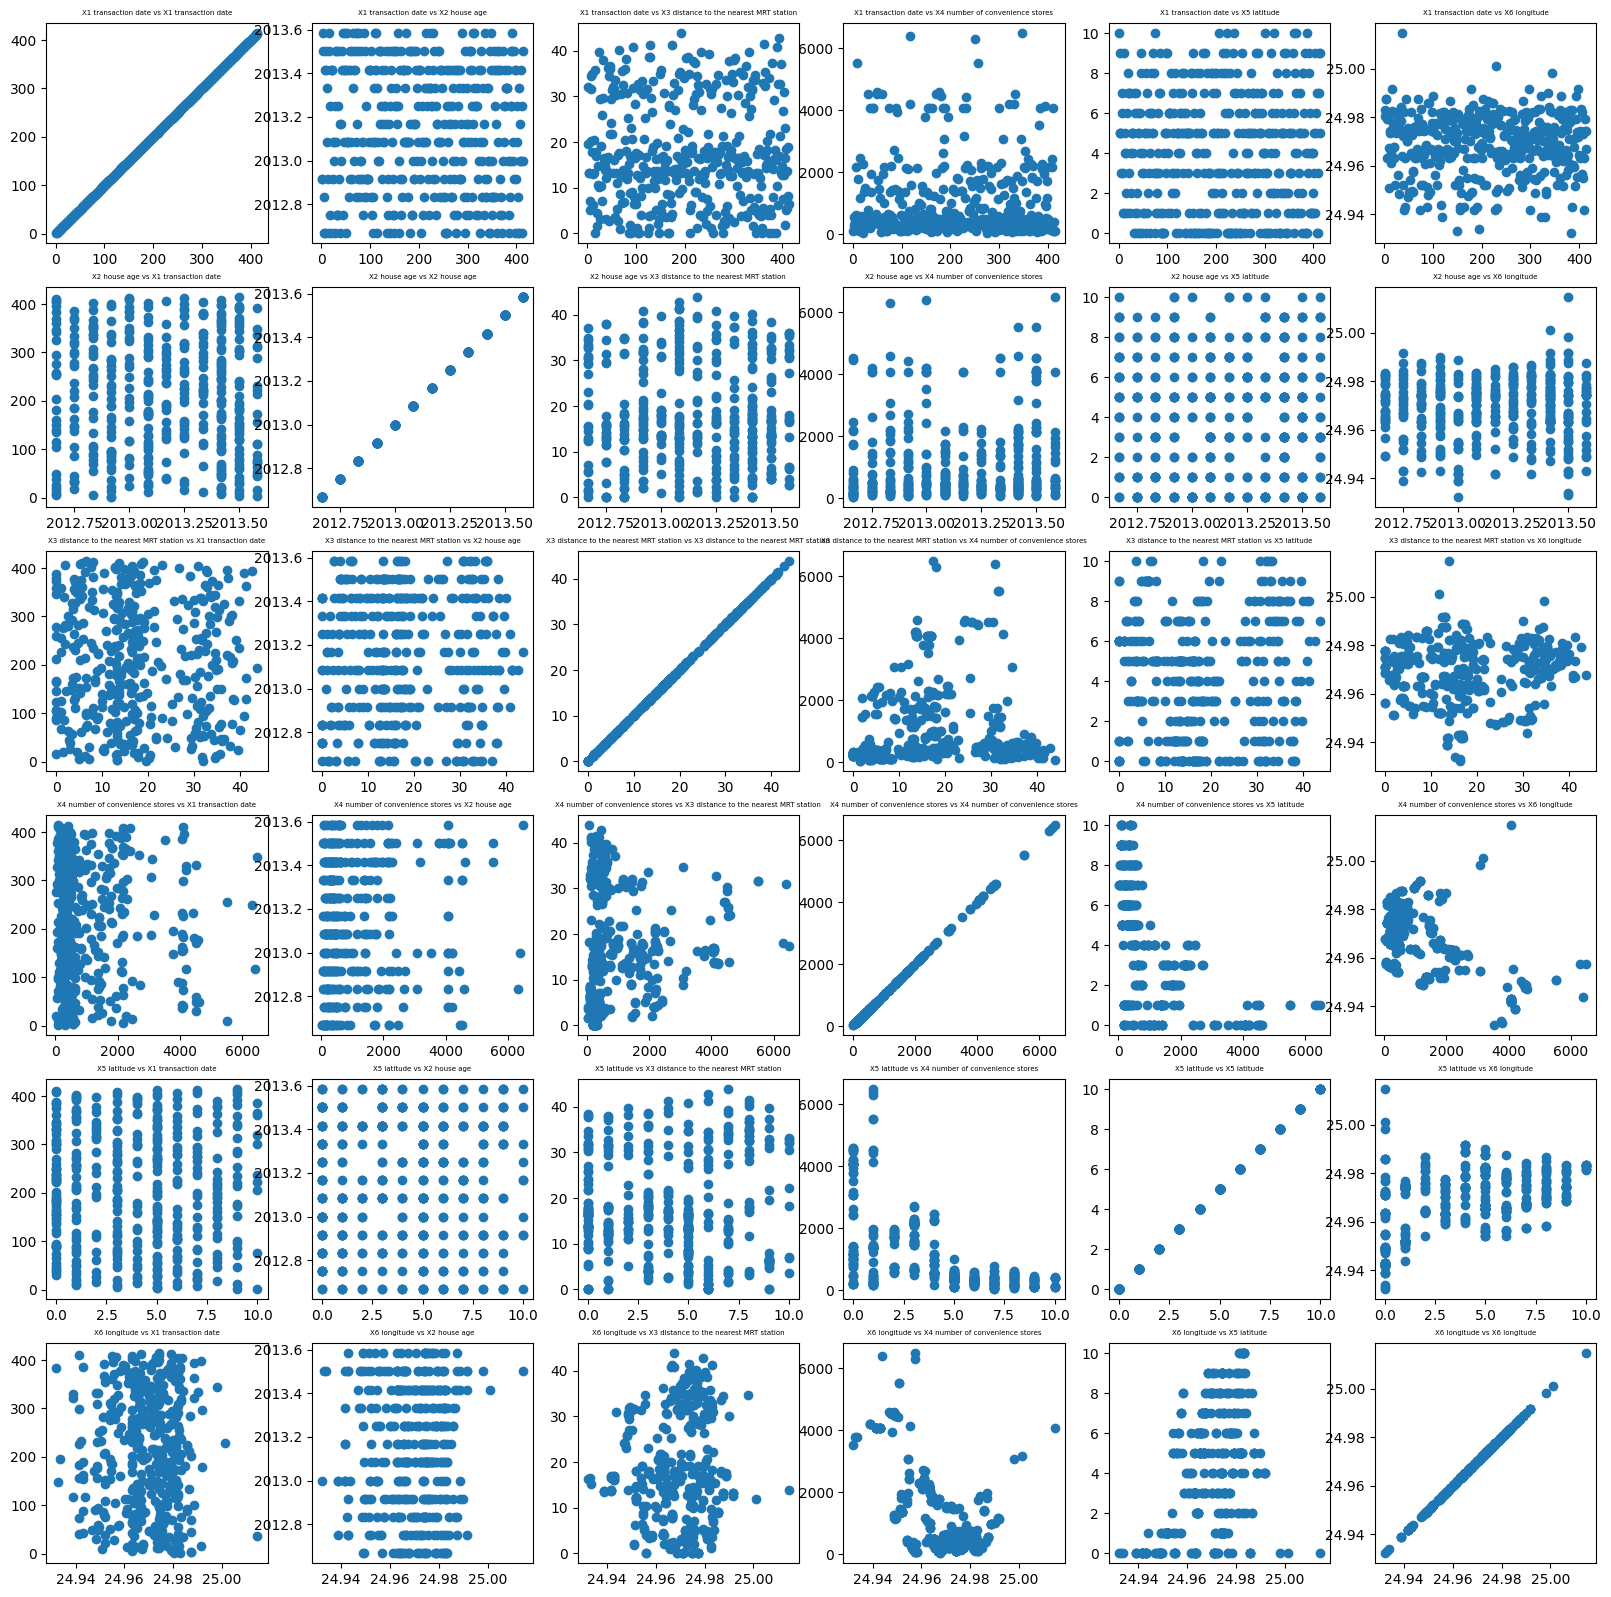

In [15]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
for i in range(6):
    for j in range(6):
        x = df.iloc[:, i]
        y = df.iloc[:, j]
        ax[i, j].scatter(x, y)
        ax[i, j].set_title(f'{df.columns[i+1]} vs {df.columns[j+1]}', fontsize=5)
        

Answer: as we see plots on diag are lines with slope m=1 but overall we can say for some features we have negative correlation for example for X4 and X6 but for other plots we can not discover a specific relation for example for X6 vs X1 there isn't a linear relation between them

Training a Linear Regression Model


How would you extract the features and the target variable from a real estate dataset, excluding the house price?

Answer:

If X represents all the features in the dataset except for the house price and y represents the number of convenience stores from the dataset ,display their shapes

In [17]:
#code here
X = df.drop(['No', 'X4 number of convenience stores', 'Y house price of unit area'], axis=1)
y = df['X4 number of convenience stores']
print(X.shape)
print(y.shape)

(414, 5)
(414,)


Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(331, 5)

In [20]:
X_test.shape

(83, 5)

Now, train a linear regression model using the training data X_train and y_train.

In [22]:
#code here
model = LinearRegression()
model.fit(X_train, y_train)

c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

LinearRegression()

Model Evaluation

Show the coefficients of the trained linear regression model and present them in a DataFrame with the corresponding feature names

In [24]:
#code here
print(f'coefficients: {model.coef_}')
print(f'bias: {model.intercept_}')


coefficients: [ 1.70867498e-01  1.51594484e-02 -1.49816979e-03  2.76499418e+01
 -1.82980736e+01]
bias: 1194.9210086898975


How would you use our trained linear regression model to make predictions on the test data X_test?

In [25]:
#code here
y_predict = model.predict(X_test)

c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for a linear regression model's predictions, and find the mean value of the 'X4 number of convenience stores' feature from the dataset and print them.

In [32]:
MAE = np.sum(abs(y_test - y_predict)) / len(y_predict)
print(f'MAE :{MAE}')
MSE = np.sum((y_predict - y_test) ** 2) / len(y_predict)
print(f'MSE : {MSE}')
print(f'RMSE : {np.sqrt(MSE)}')
mean = np.mean(df['X4 number of convenience stores'])
print(f'Mean of X4 : {mean}')

MAE :1.8771693381503889
MSE : 5.550552259950417
RMSE : 2.3559610056090525
Mean of X4 : 4.094202898550725


## Residual Histogram

Often for Linear Regression it is a good idea to separately evaluate residuals $$(y-\hat{y})$$ and not just calculate performance metrics (e.g. RMSE).

Let's explore why this is important...

The residual erors should be random and close to a normal distribution.

Compute the residuals from the test predictions and visualize their distribution using both a kernel density estimation (KDE) plot and a seaborn histogram with a KDE overlay.

C:\Users\mohammmadparsa\AppData\Local\Temp\ipykernel_9320\4236794791.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_residual, shade=True)
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

Text(0.5, 1.0, 'Histogram with KDE Overlay of Residuals')

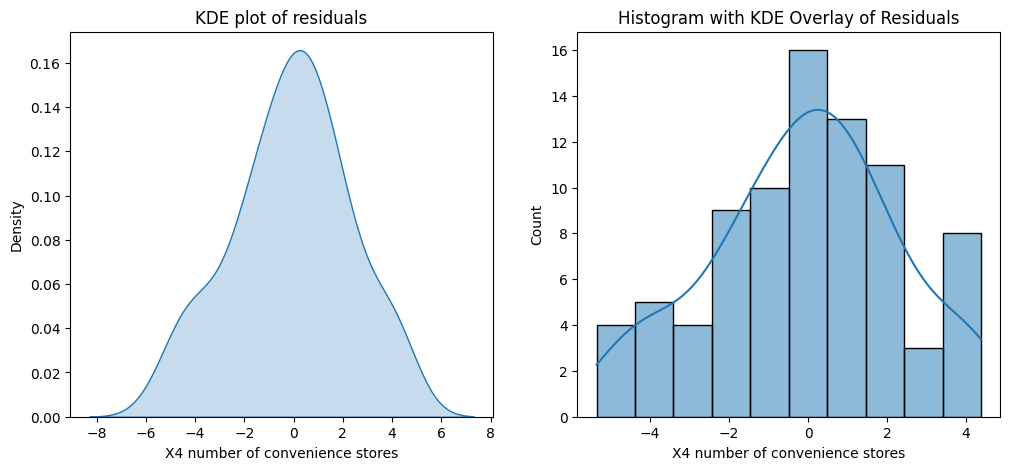

In [36]:
test_residual= y_test - y_predict
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(test_residual, shade=True)
plt.title('KDE plot of residuals')

plt.subplot(1, 2, 2)
sns.histplot(test_residual, kde=True, bins=10)
plt.title('Histogram with KDE Overlay of Residuals')

* **Residual plot shows residual error VS. true y value.**

Create a scatter plot to visualize the relationship between the true values (y_test) and the residuals, and add a horizontal line at y=0 to indicate where the residuals should ideally fall

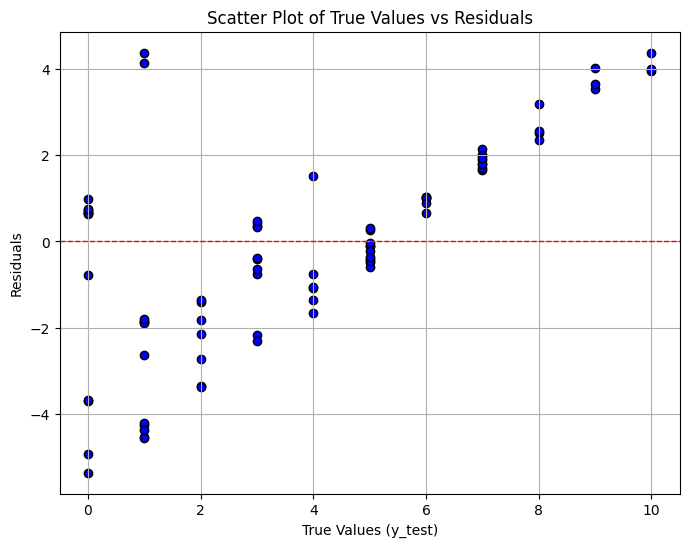

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_residual, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Scatter Plot of True Values vs Residuals')
plt.xlabel('True Values (y_test)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

* **Residualplot showing a clear pattern, indicating Linear Regression no valid!**